In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.xlsx to heart.xlsx


In [ ]:
heart=pd.read_excel('heart.xlsx')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:

# Convert `num` to binary (1 if heart disease present, 0 if not)
heart['num'] = heart['num'].apply(lambda x: 1 if x > 0 else 0)

# Encode categorical variables
df_encoded = pd.get_dummies(heart, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'],dtype=int)
df_encoded.isnull().sum()
df_encoded.fillna(df_encoded.mean(), inplace=True)
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)



In [ ]:
df_encoded.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,132,0.0,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,148,0.4,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,190,0.0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,126,1.5,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
df_encoded.columns

In [ ]:
df_encoded.isnull().sum()

age                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
num                         0
sex_Female                  0
sex_Male                    0
cp_asymptomatic             0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_False                   0
fbs_True                    0
restecg_lv hypertrophy      0
restecg_normal              0
restecg_st-t abnormality    0
exang_False                 0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_downsloping           0
slope_flat                  0
slope_upsloping             0
thal_fixed defect           0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [ ]:
df_encoded.describe()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,0.560573,0.209251,0.790749,0.545154,0.181718,...,0.568282,0.371145,0.020925,0.039648,0.172907,0.498899,0.328194,0.231278,0.371145,0.397577
std,9.158031,20.401608,112.097949,26.804929,1.055826,0.496591,0.406998,0.406998,0.498231,0.385825,...,0.495589,0.483378,0.143213,0.195237,0.378376,0.500274,0.469815,0.421882,0.483378,0.489667
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


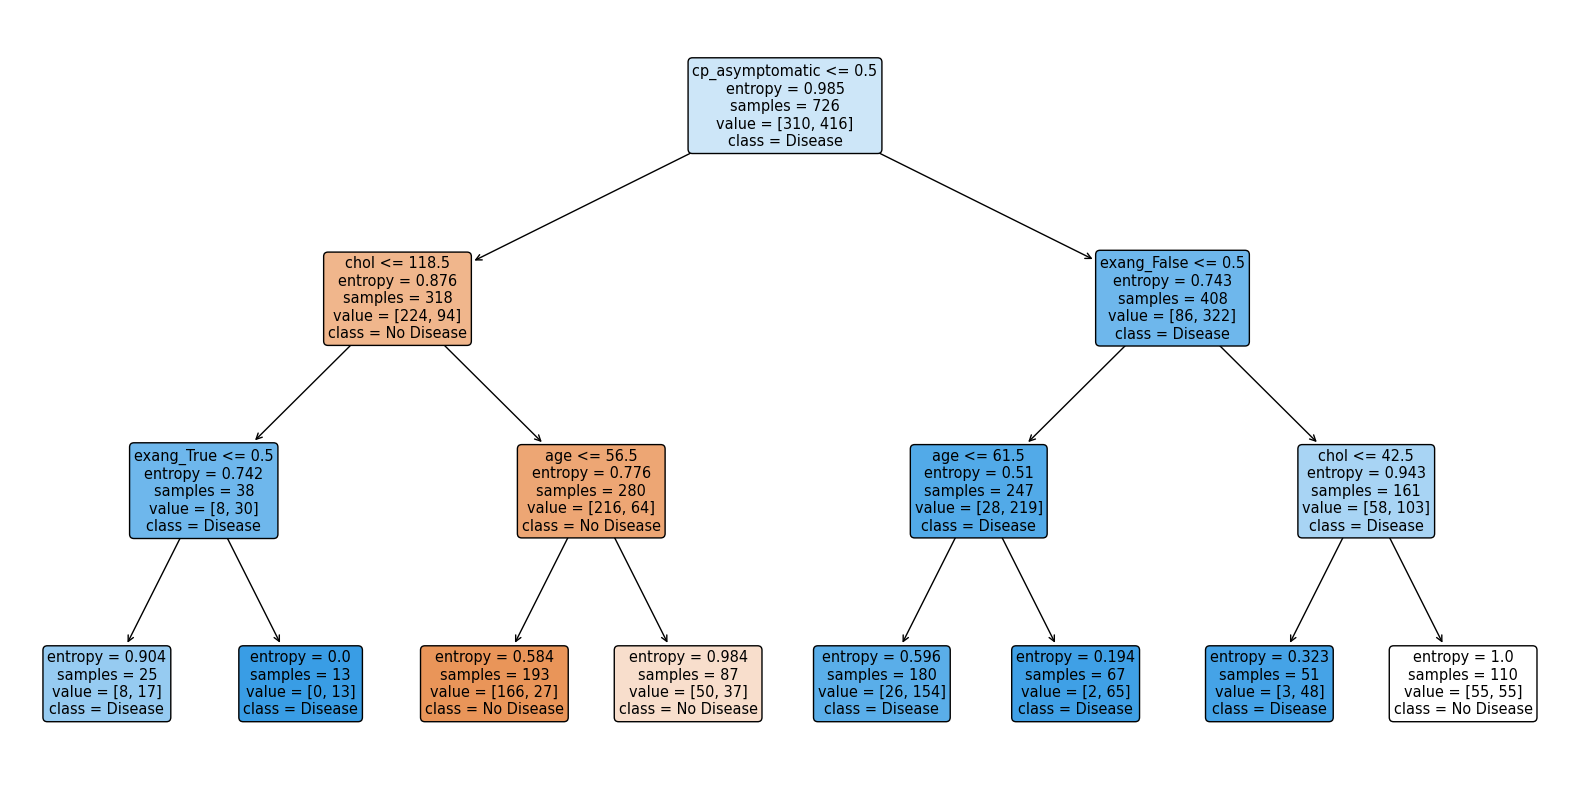

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree # Import the plot_tree function

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.show()